## Seun Holiness OLORUNTOBA Project

### Problem Statement 
The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

### Objective

To Explore and visualize the dataset.

To Build a classification model to predict if the customer is going to churn or not

To Optimize the model using appropriate techniques

To Generate a set of insights and recommendations that will help the bank


### **Data Description:**

CLIENTNUM: Client number. Unique identifier for the customer holding the account
    
Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
    
Customer_Age: Age in Years
    
Gender: Gender of the account holder
    
Dependent_count: Number of dependents
    
Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
    
Marital_Status: Marital Status of the account holder
    
Income_Category: Annual Income Category of the account holder
    
Card_Category: Type of Card
    
Months_on_book: Period of relationship with the bank
    
Total_Relationship_Count: Total no. of products held by the customer
    
Months_Inactive_12_mon: No. of months inactive in the last 12 months
    
Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
    
Credit_Limit: Credit Limit on the Credit Card
    
Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
    
Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
    
Total_Trans_Amt: Total Transaction Amount (Last 12 months)
    
Total_Trans_Ct: Total Transaction Count (Last 12 months)
    
Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
    
Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
    
Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [362]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#To oversample and undersample the data 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [363]:
#Loading the dataset 
data = pd.read_csv("BankChurners.csv")

In [364]:
#Visualize the first five observation data
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [365]:
#View the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Observations: 

There are a total of 21 columns and 10127 observations in the dataset

There are 2 columns that has less than 10127 non-values i.e columns with missing values

In [366]:
#Check the percentage of missing values in each columns 
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)})

% of Missing Values
CLIENTNUM                               0.000
Attrition_Flag                          0.000
Customer_Age                            0.000
Gender                                  0.000
Dependent_count                         0.000
Education_Level                        15.000
Marital_Status                          7.400
Income_Category                         0.000
Card_Category                           0.000
Months_on_book                          0.000
Total_Relationship_Count                0.000
Months_Inactive_12_mon                  0.000
Contacts_Count_12_mon                   0.000
Credit_Limit                            0.000
Total_Revolving_Bal                     0.000
Avg_Open_To_Buy                         0.000
Total_Amt_Chng_Q4_Q1                    0.000
Total_Trans_Amt                         0.000
Total_Trans_Ct                          0.000
Total_Ct_Chng_Q4_Q1                     0.000
Avg_Utilization_Ratio                   0.000

### Observations: 

Education_Level has 15% missing values out of the total observation

Marital_Status has 7.4% missing values out of the total observation 

We will impute these values after splitting the data to avoid data leakage

#### Checking the Unique Values of each Column 

In [367]:
#Checking unique value to know the Numerical and Categorical variables
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64


### Observations:

We can drop the column - CLIENTNUM as it is unique for each customers and will not add any significant value to the model

Customer_Age, Months_on_book, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Amt_Chng_Q4_Q1     
Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio - These are Continous variables

Attrition_Flag, Gender,Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category , Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon  - These are categorical variables

In [368]:
#Dropping CLIENTNUM column
data.drop(columns='CLIENTNUM', inplace = True)

### Summary of the data


In [369]:
#Review the statistical summary of the continous variables 
data.describe().T

count     mean      std      min      25%  \
Customer_Age             10127.000   46.326    8.017   26.000   41.000   
Dependent_count          10127.000    2.346    1.299    0.000    1.000   
Months_on_book           10127.000   35.928    7.986   13.000   31.000   
Total_Relationship_Count 10127.000    3.813    1.554    1.000    3.000   
Months_Inactive_12_mon   10127.000    2.341    1.011    0.000    2.000   
Contacts_Count_12_mon    10127.000    2.455    1.106    0.000    2.000   
Credit_Limit             10127.000 8631.954 9088.777 1438.300 2555.000   
Total_Revolving_Bal      10127.000 1162.814  814.987    0.000  359.000   
Avg_Open_To_Buy          10127.000 7469.140 9090.685    3.000 1324.500   
Total_Amt_Chng_Q4_Q1     10127.000    0.760    0.219    0.000    0.631   
Total_Trans_Amt          10127.000 4404.086 3397.129  510.000 2155.500   
Total_Trans_Ct           10127.000   64.859   23.473   10.000   45.000   
Total_Ct_Chng_Q4_Q1      10127.000    0.712    0.238    0.000    0.582   
Avg_Utilization_Ratio    10127.000    0.275    0.276    0.000    0.023   

                              50%       75%       max  
Customer_Age               46.000    52.000    73.000  
Dependent_count             2.000     3.000     5.000  
Months_on_book             36.000    40.000    56.000  
Total_Relationship_Count    4.000     5.000     6.000  
Months_Inactive_12_mon      2.000     3.000     6.000  
Contacts_Count_12_mon       2.000     3.000     6.000  
Credit_Limit             4549.000 11067.500 34516.000  
Total_Revolving_Bal      1276.000  1784.000  2517.000  
Avg_Open_To_Buy          3474.000  9859.000 34516.000  
Total_Amt_Chng_Q4_Q1        0.736     0.859     3.397  
Total_Trans_Amt          3899.000  4741.000 18484.000  
Total_Trans_Ct             67.000    81.000   139.000  
Total_Ct_Chng_Q4_Q1         0.702     0.818     3.714  
Avg_Utilization_Ratio       0.176     0.503     0.999

### Observations:

Mean and Median of Customer_Age are close, almost the same approximately 46 with Minimum age of 26 amd Maximum age of 73 which looks normal

Credit_Limit,Avg_Open_To_Buy,Total_Trans_Amt, Total_Trans_Ct may have some outliers because the 75th percentile value and the Max Value are far apart

Months_Inactive_12_mon & Contacts_Count_12_mon data distributions are almost the same 




### Counting each unique category in each categorical variable 

In [370]:
#Count each uniques category variable
cat_col = ['Attrition_Flag','Gender','Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category' , 
           'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
for colum in cat_col:
    print (data[colum].value_counts())
    print ('-'*50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Go

### Observations:

There are far more Existing Customers approx 84% compared to Attrited Customers approx 16%

Majority of the Customers are Females

The target variable is imbalanced as most of the  attrition flag are Existing Customers 

The income category has a category names "abc" which does not state amount lets call this 'Unknown',  


In [371]:
#Replacing 'abc' with 'Unknown'
data.Income_Category = data.Income_Category.replace('abc', 'Unknown')

In [372]:
#Check if the replacement has been done 
cat_col = ['Attrition_Flag','Gender','Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category' , 
           'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
for colum in cat_col:
    print (data[colum].value_counts())
    print ('-'*50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Go

In [373]:
#Converting the data type of each categorical variable to 'category' to reduce space
for column in cat_col:
    data[column] = data[column].astype('category')

In [374]:
#Confirm data type change 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  category
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  category
 10  Months_Inactive_12_mon    10127 non-null  category
 11  Contacts_Count_12_mon     10127 non-null  category
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

### Observations 

Memory usage reduced from 1.6MB to 892KB

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [375]:
# Below is a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots  and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,15), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

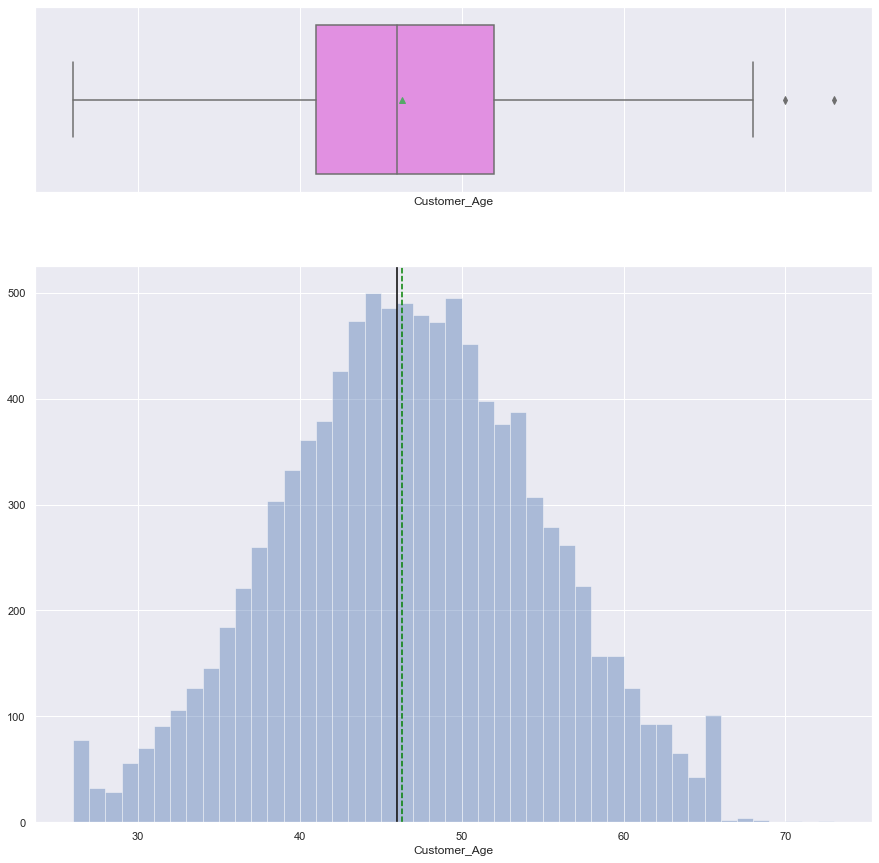

In [376]:
histogram_boxplot(data['Customer_Age'])

### Observation: 

Customer_Age distribution looks approximately normally distributed

Customers_Age shows some extreme outliers on the right but this would be retained as it is within acceptable age range 

Customer_Age can be an important variable while understanding attrition of customers for credit card account. We will further explore this in bivariate analysis.

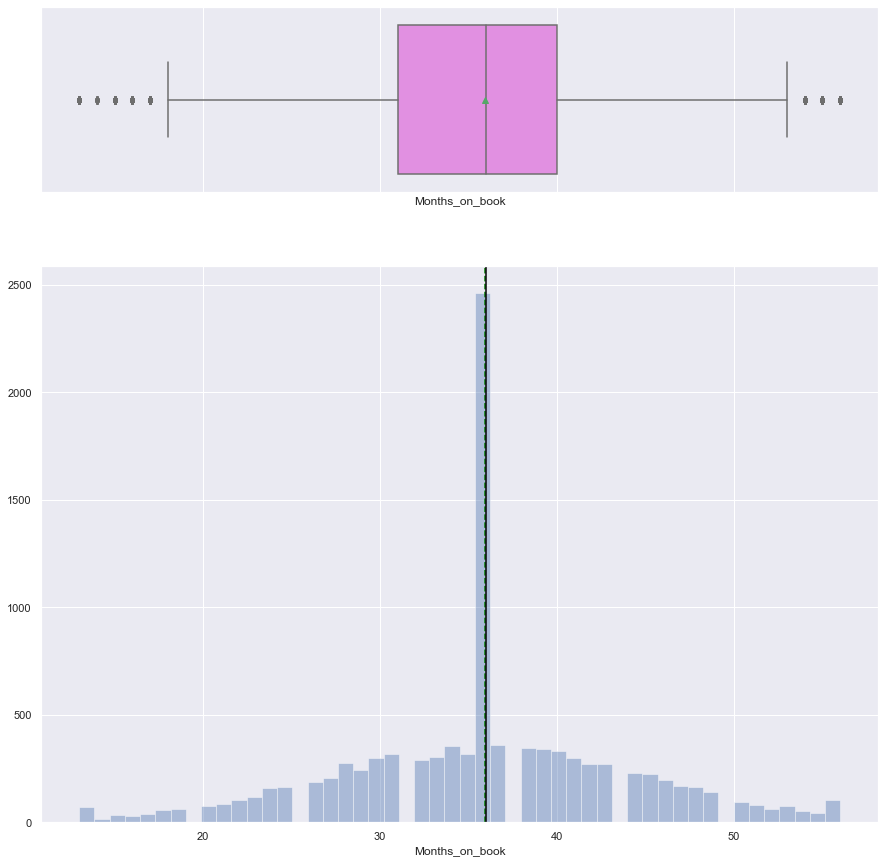

In [377]:
histogram_boxplot(data['Months_on_book'])

### Observation: 

Months_on_Book looks a bit normal but the median seems extremely higher with a high number od customers opening account at the same time. 

There are outliers on both side but they are normal as some may have been with the bank earlier or registered earlier, the outlier seems normal

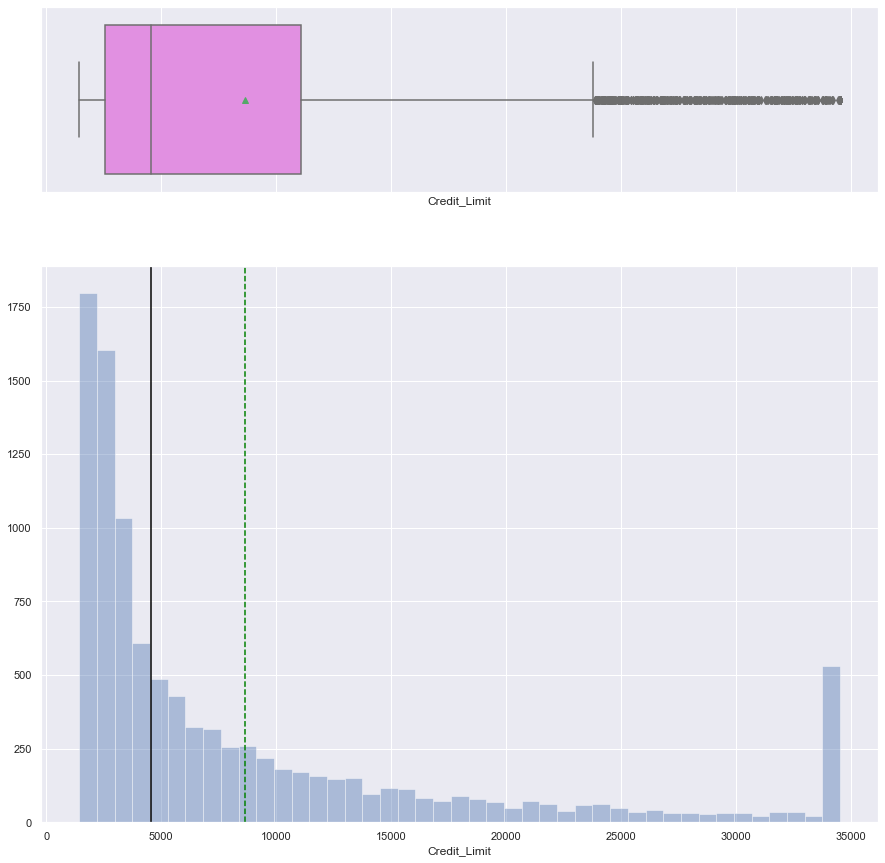

In [378]:
histogram_boxplot(data['Credit_Limit'])

###  Observation: 

The Credit_Limit distribution is skewed towards the right with exception of a rise around 34,000

The mean and the median are far apart with more customers with Credit_Limit less than 5,000

There are so many outliers but Credit limit varies and it still acceptable within the range as there are different type of customers Premiun, standard or classic based on their credit worth

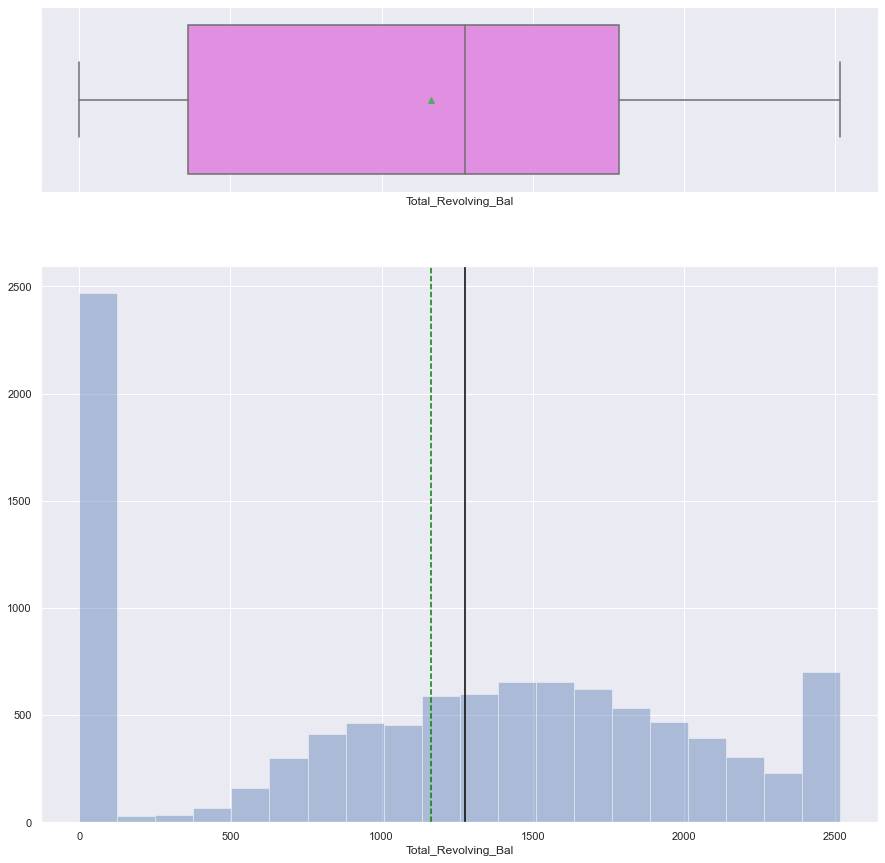

In [379]:
histogram_boxplot(data['Total_Revolving_Bal'])

### Observation: 

The highest count of those with low Total_Revolving_Bal was high, and the number of those with high Total_Revolving_Bal was also a bit high but not as much as the lower amount while other spread between these two extremes 

No outliers identified in this distribution of Total_Revolving_Bal

The mean and the median are close to each other 



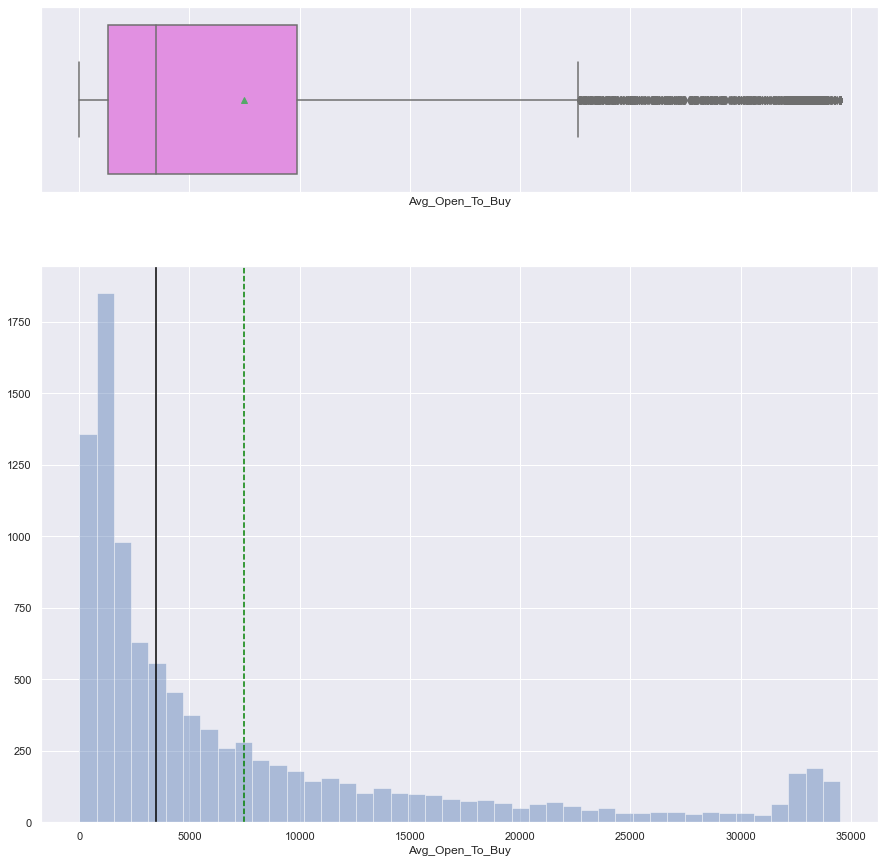

In [380]:
histogram_boxplot(data['Avg_Open_To_Buy'])

### Observations: 

This is rightly skewed with exception towards the tail end

There are outliers but these may not be removed as this aligns with credit card variation in customers 


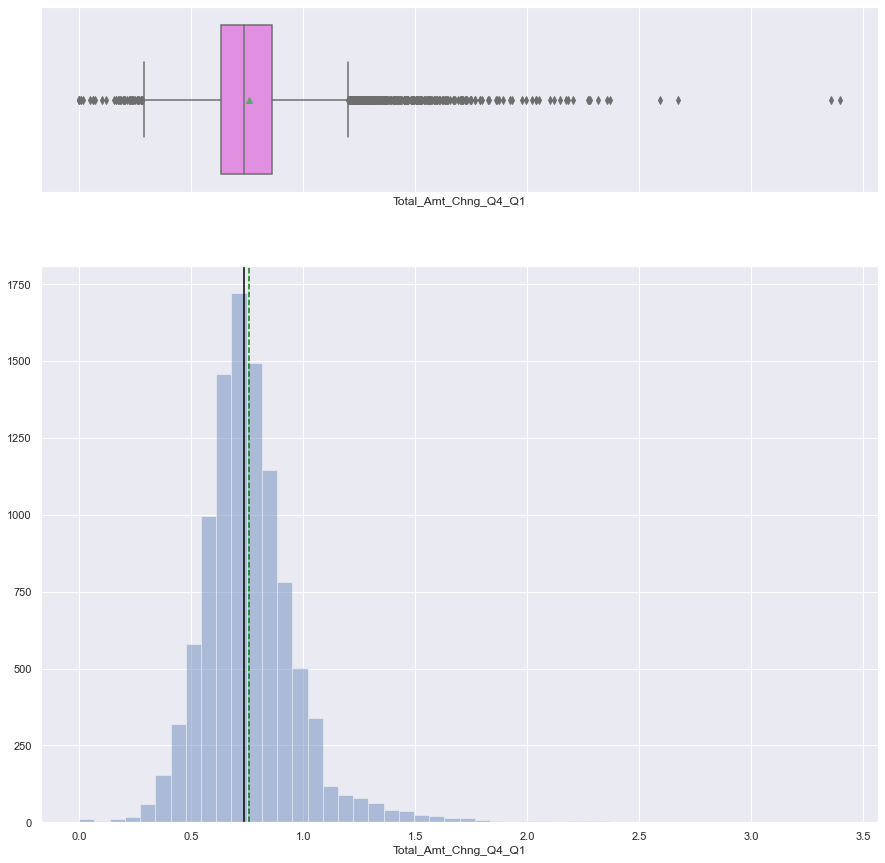

In [381]:
histogram_boxplot(data['Total_Amt_Chng_Q4_Q1'])

### Observation: 

This looks Normal with some outliers which could be retained 

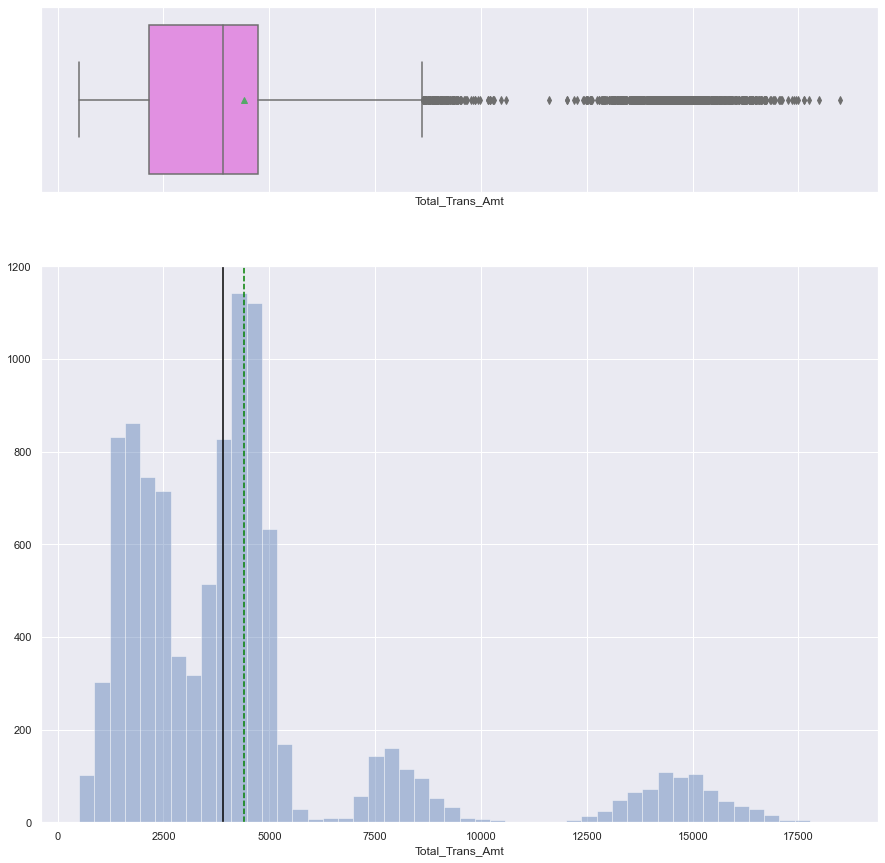

In [382]:
histogram_boxplot(data['Total_Trans_Amt'])

### Observation: 

Total_Transc_Amt has different throughs and outliers, this need to be investigated further, as these outliers may just be the normal variation and distribution of customers 

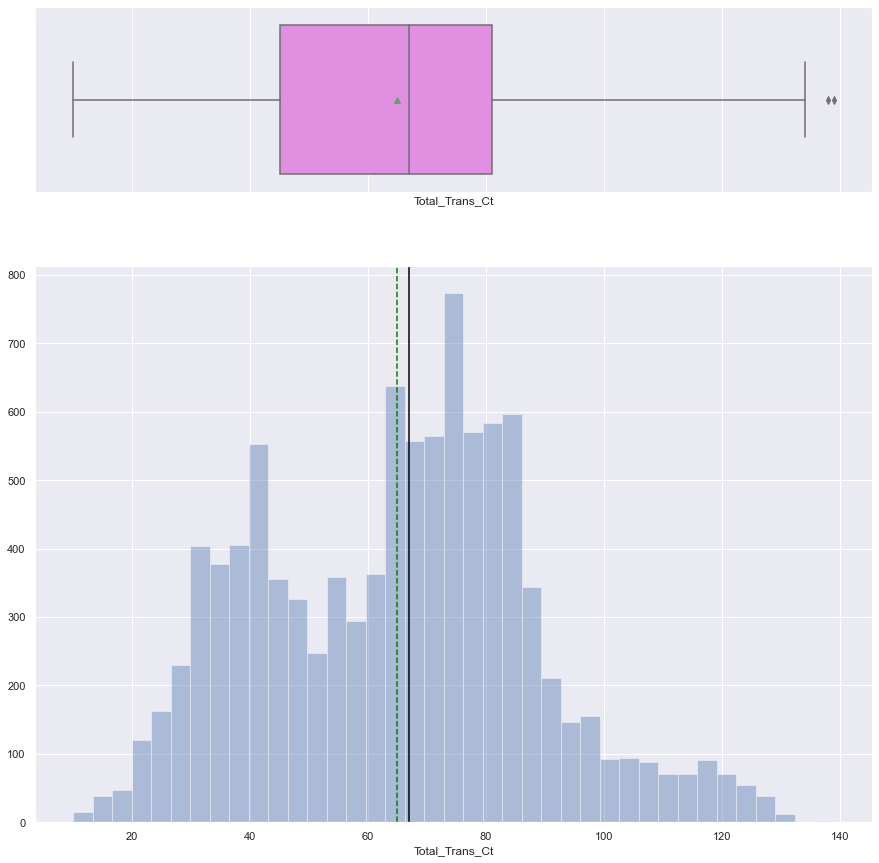

In [383]:
histogram_boxplot(data['Total_Trans_Ct'])

### Observation: 

Total_Trans_Ct is somewhat normal but has troughs with few outliers, the outliers would be retained as there are variation in customers 

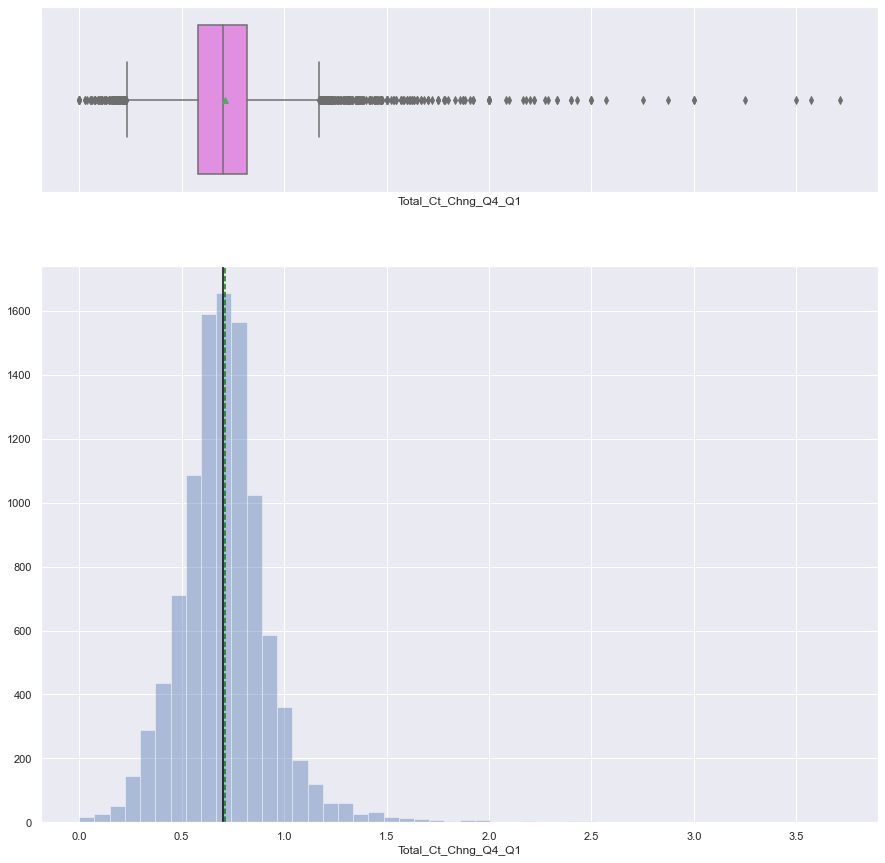

In [384]:
histogram_boxplot(data['Total_Ct_Chng_Q4_Q1'])

### Observation: 

Total_Ct_Chng_Q4_Q1 looks normal with some outliers, the outliers would be retained as it aligns with the data distribution expected

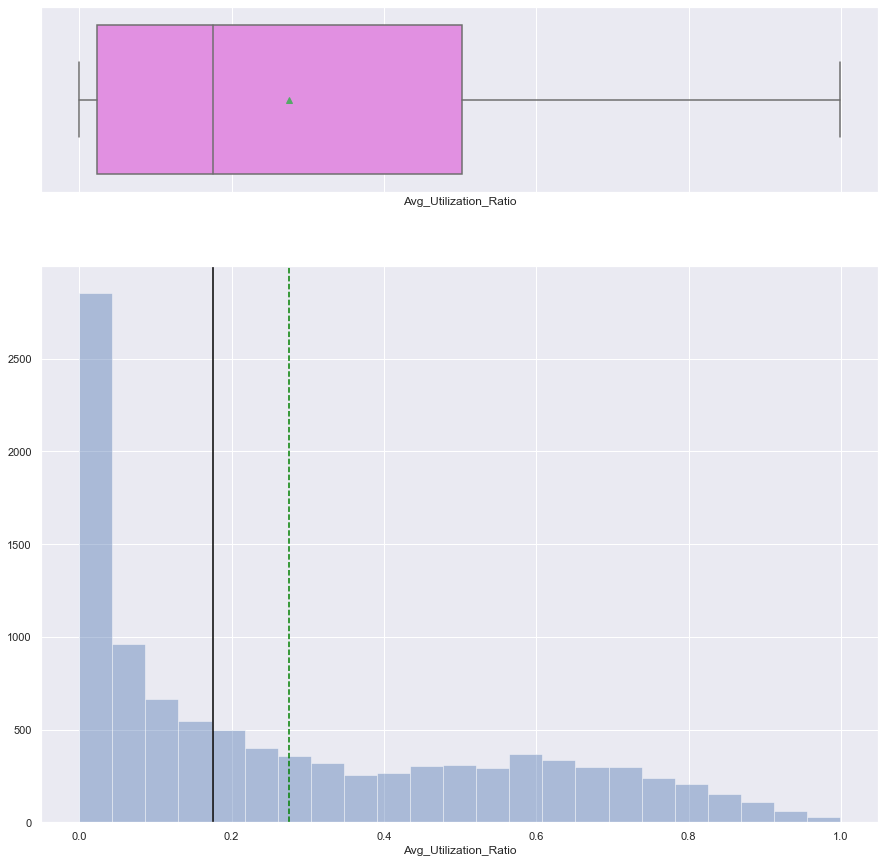

In [385]:
histogram_boxplot(data['Avg_Utilization_Ratio'])

### Observation: 
Avg_Utilization_Ratio is rightly skewed with no outlier

### Understanding the Categorical Variable with the aid of bar chart

In [386]:
#This function is used for the analysis of the categorical variables 

def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(10,5)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

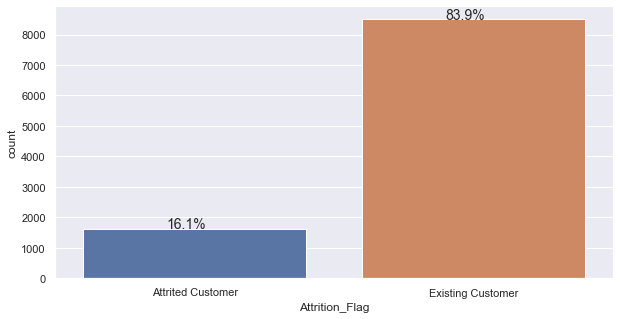

In [387]:
perc_on_bar(data['Attrition_Flag']) 

### Observations:

This plot shows the distribution of both classes (Attrited and Existing Customers) in the target variable is imbalanced 

We have approximately 16% of customers that have attrited 

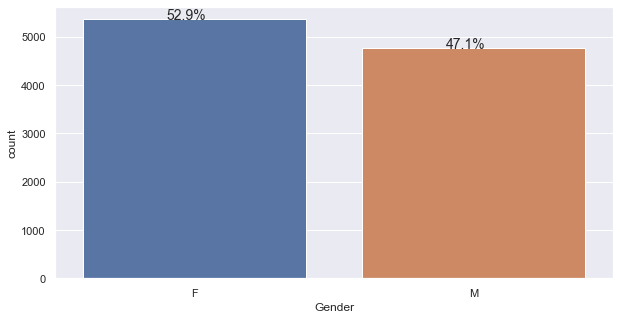

In [388]:
perc_on_bar(data['Gender']) 

### Observations:

There are more female customers than male 

There are approximately 53% female customers as compared to 47 % male customers 

We need to enquire more if female attrited more than female or otherwise, as having higher number of female customers does not mean they have highest attrition 


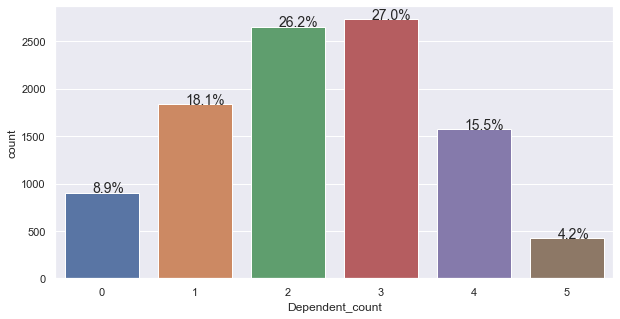

In [389]:
perc_on_bar(data['Dependent_count']) 

### Observations:

The highest number of customers have 3 (27%) or 2 (26%) dependent, this is reasonable as most family have 2 or 3 dependent

The lowest dependent approx. 4% was 5 dependent

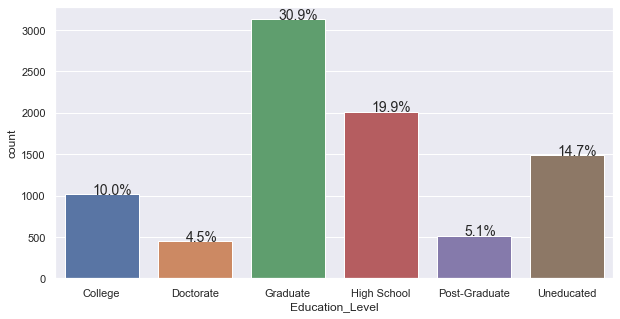

In [390]:
perc_on_bar(data['Education_Level']) 

### Observations:

The highest Educational Level by customers were Graduates with approximately 31% this may be connected with the fact that the highest level of education attained by professional for great career is graduate education. 

Doctorate has the least percentage approx. 5% and this may not be unconnected with the fact that Doctorate is the highest academic attainement and less people strive to achieve such feat. 

High school is also high appx. 20% which may be because several customers stop at high school to pursue other vocational jobs

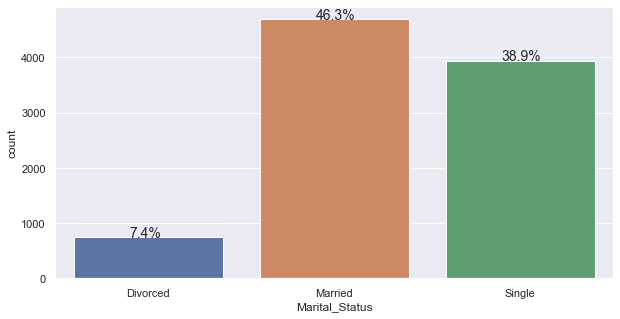

In [391]:
perc_on_bar(data['Marital_Status']) 

### Observations:

There are more married customers with the credit card accounts, this may be connected with the fact that married customers have more recurring expenses which would require them using credit card than singles 

Divorced are few, not necessarily because few divorced people have the credit card account but because there are less number of Divorcee compared to married and single customers 

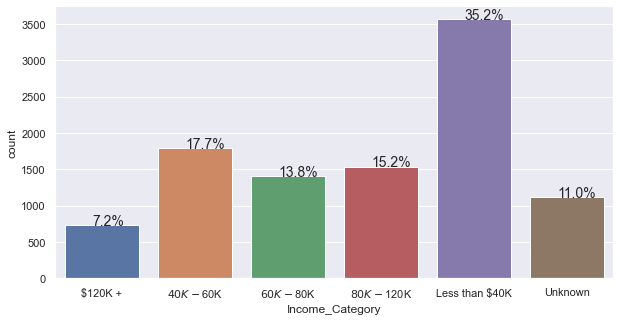

In [392]:
perc_on_bar(data['Income_Category']) 

### Observations:

There are more customers earning less than $40K than others and this may not necessarily mean there are more lesser income customers having the credit card account but rather this is the normal income distribution of the enstire working professionals

There are about 11% that their income is unknown 

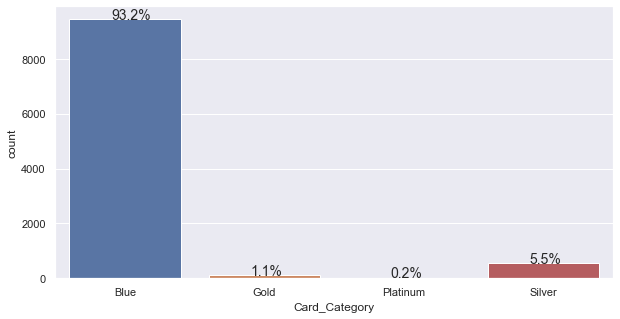

In [393]:
perc_on_bar(data['Card_Category']) 

### Observations:

The highest number of customers subscribed to the Blue Card, this may be because it has the least credit limit

The other category Gold, platinum and Silver all contributed about 7% which is very small compared to just the blue card alone

The Other cards being low may not be unconnected with the credit history and amount required as turnover for it to be given to customers 

More information required on the limits of these cards etc to be able to make more informed decisions 

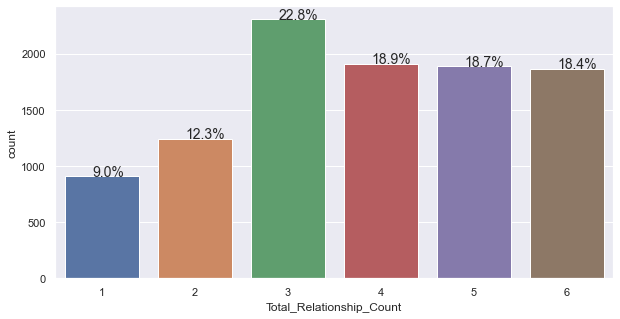

In [394]:
perc_on_bar(data['Total_Relationship_Count']) 

### Observations:

The most frequent total no of product held by customers are 3 (approx. 23%) followed by 4 (approx.19%)

Customers with 4, 5 &6 product have relatively the same persentage of between 18-19 % approx. 

The least total number of product held was one. 

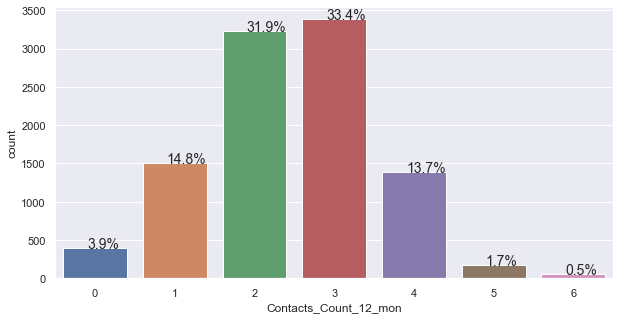

In [395]:
perc_on_bar(data['Contacts_Count_12_mon']) 

### Observations:

The highest number of contacts between banks and customers within the last 12 months is 3 contacts 

After the 3rd contact the frequency reduced which may not be unconnected with the bank reducing their contact after 3 attempts


## Bivariate Analysis

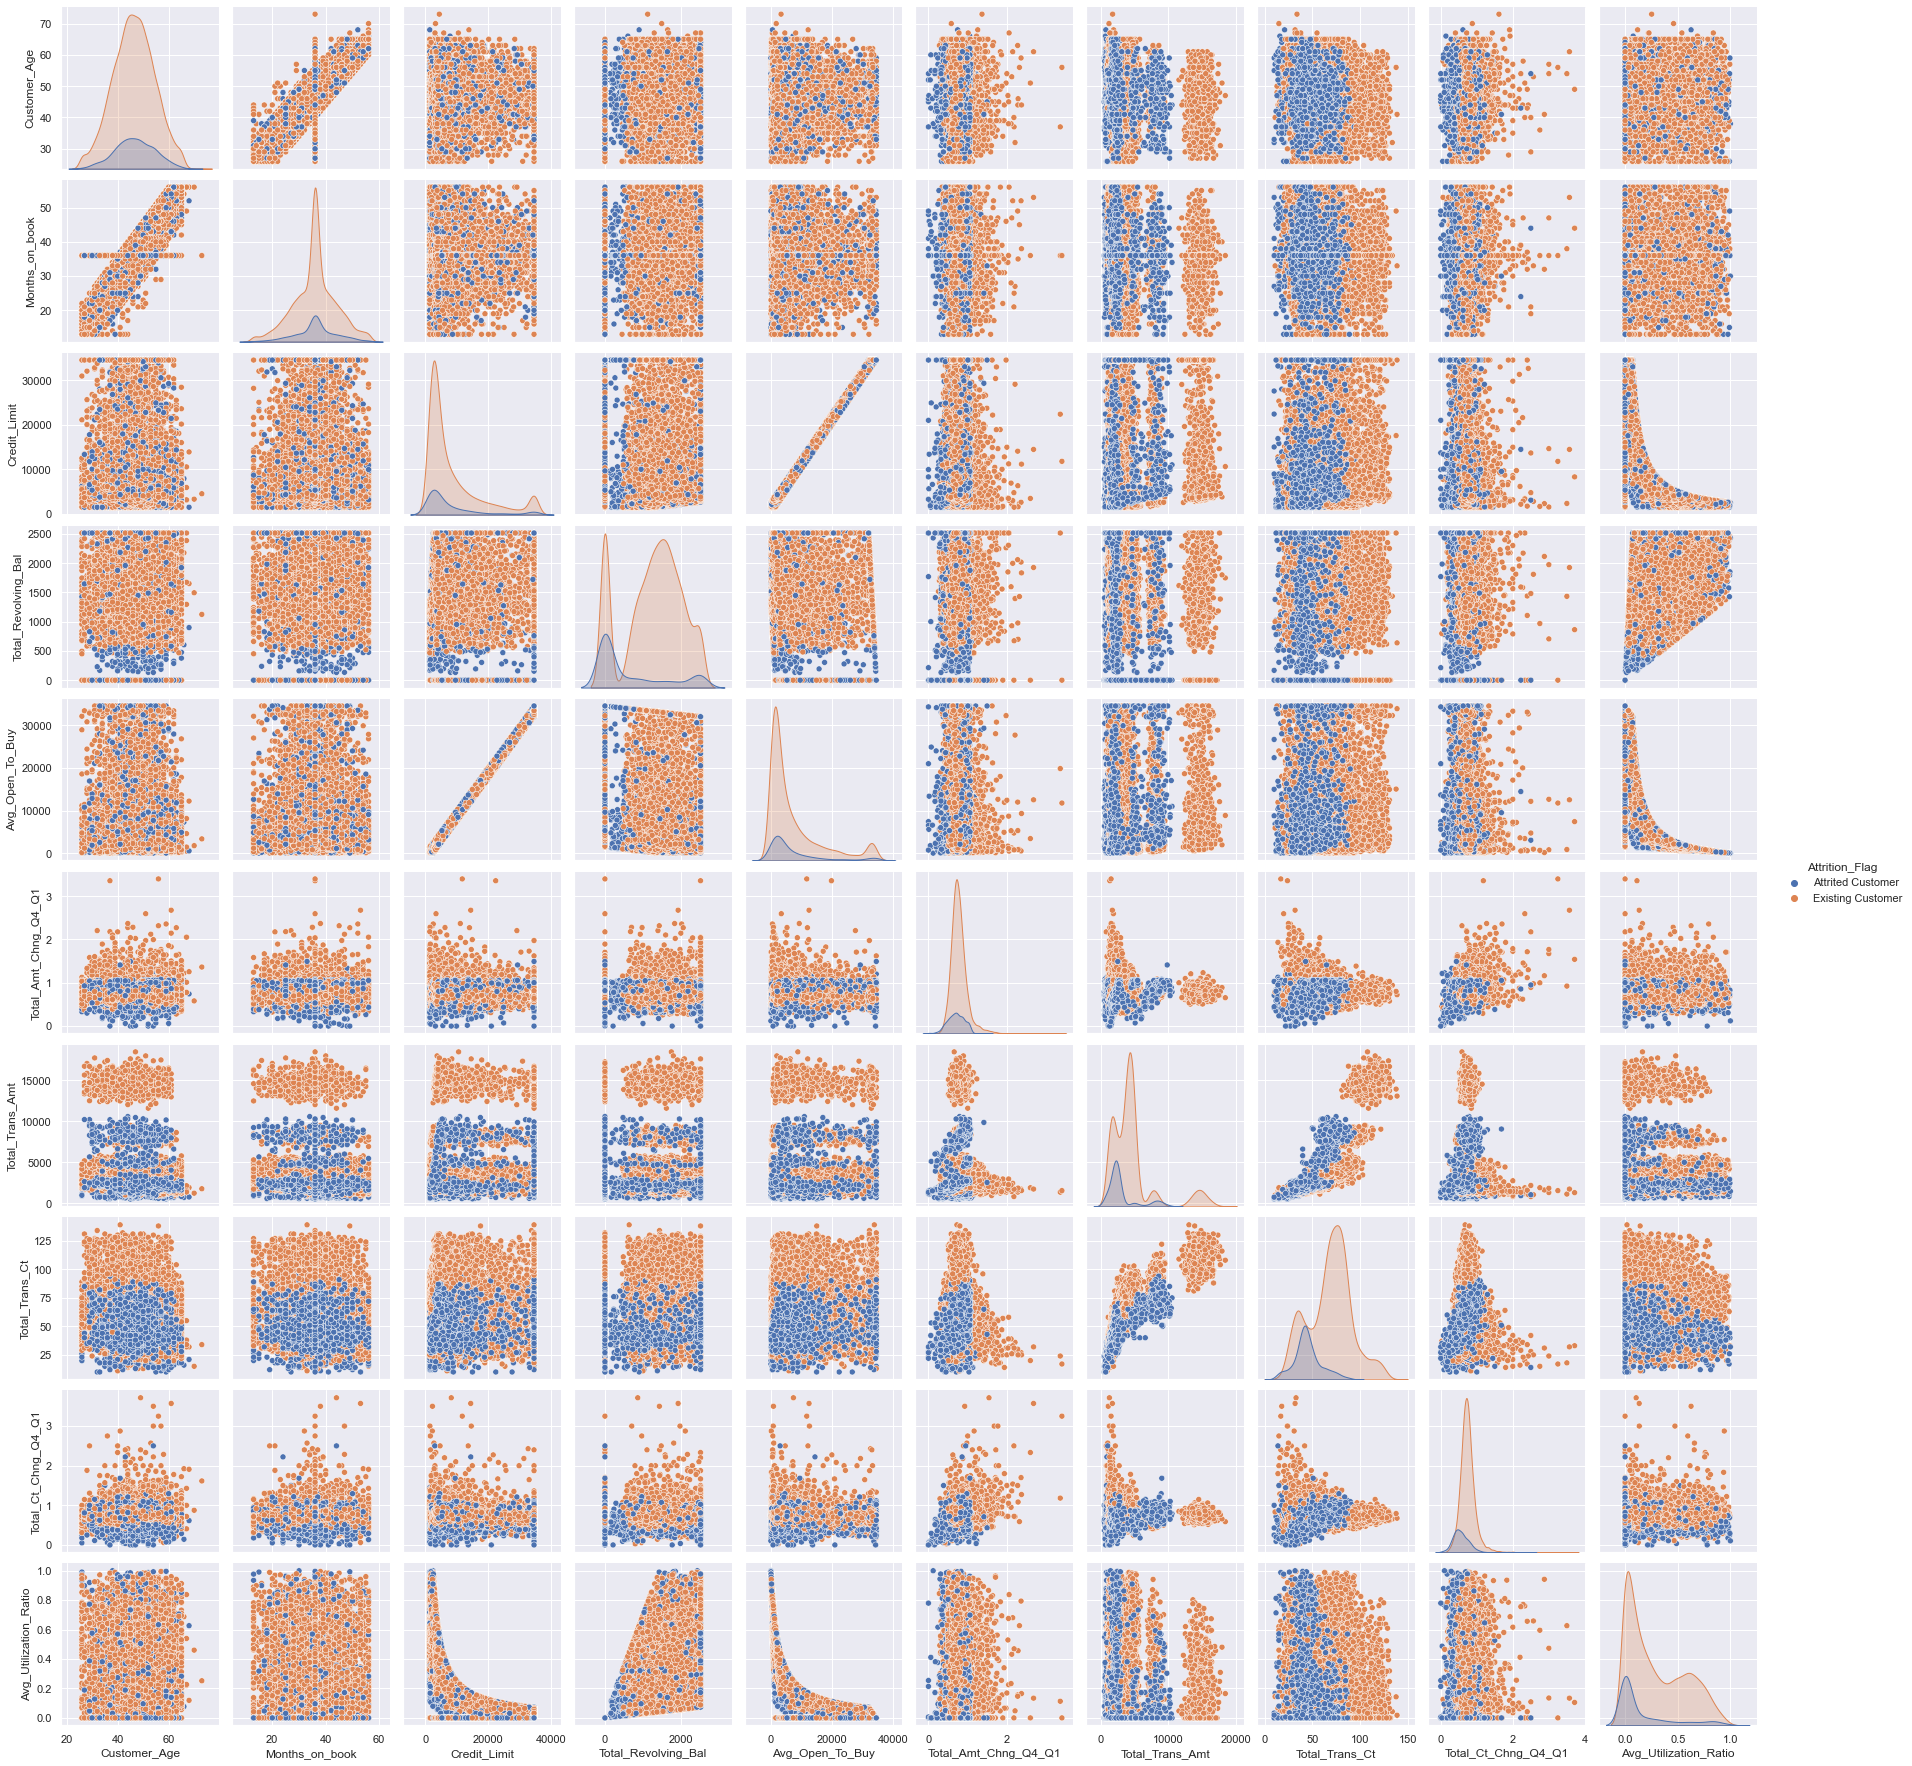

In [396]:
# pairplot analysis
sns.pairplot(data = data, hue = 'Attrition_Flag')

### Observations:

Avg_Open_To_Buy and Credit_Limit are highly correlated we may remove one of them later or leave them as may br required

Several of the features overlaps but there are some that has some separation features between the Attrited Customers and Existing Customers.

There are a bit of distinctions between Attrited Customers and Existing Customers between the following features:
Total_Amt_Chng_Q4_Q1 & Total_Trans_Amt 
Total_Amt_Chng_Q4_Q1 & Total_Trans_Ct
Total_Trans_Ct  & Total_Trans_Amt 

Overall Total_Trans_Amt , Total_Trans_Ct, Total_Amt_Chng_Q4_Q1 has some few separations which should be reviewed further

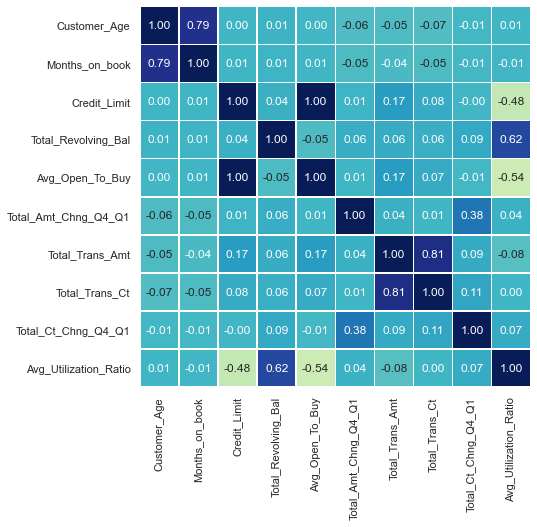

In [397]:
#Correlation Heatmap as additions to the pairplot
sns.set(rc={'figure.figsize':(7,7)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu",
            fmt='0.2f')
plt.show()

### Observations:

Avg_Open_To_Buy and Credit_Limit are high highly correlated we may remove one of them later

Month_on_book and Customer age are somewhat correlated 

Avg_Utilization Ratio and Total_Revolving_Bal are somewhat correlated 

Total_Trans_Ct and Total_Trans_Amt are correlated 


### To define more function to plot stacked bar charts to understand the effect of attrited customers on other categorical variables 

In [398]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=True
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


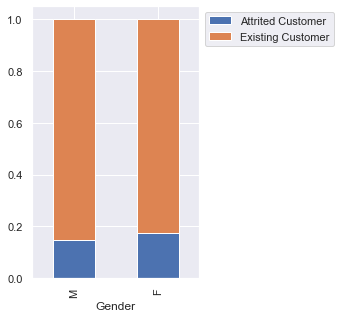

In [399]:
stacked_barplot(data, "Gender", "Attrition_Flag")

### Observation:

There are slightly more Female that are Attrited Customers than Male 

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


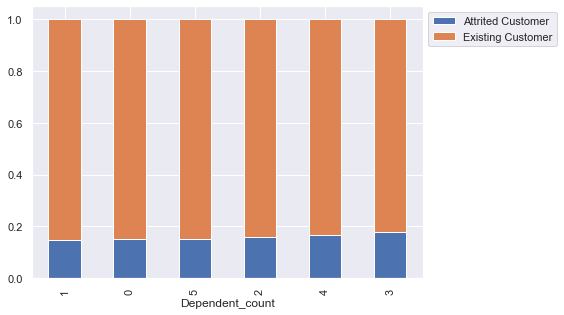

In [400]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

### Observations:

The customers that have 3 dependents attrited the most  with approx. 18%, this may be due to them having highest number compared to other groups

The least that attrited are the customers with 0 or 1 dependent 

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


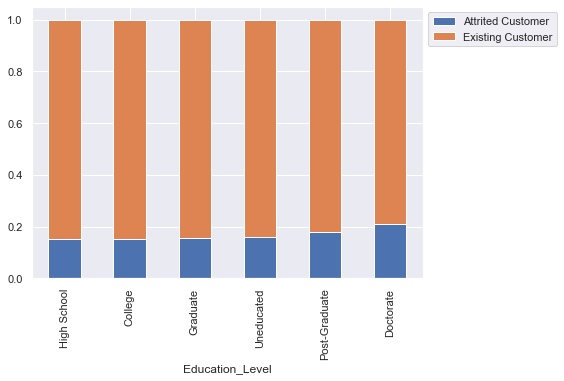

In [401]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

### Observations:

Doctorate are the one that attritted most, this may be unconnected with their education level as they are able to analyse the amount that banks are earning based on the cards and therefore find other means to mange their payment.




Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


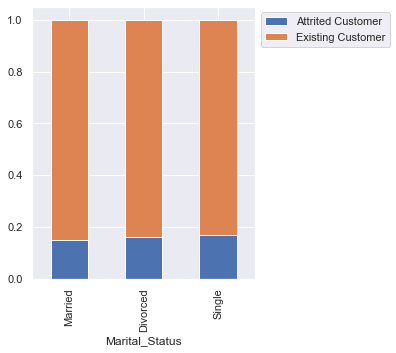

In [402]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

### Observation:

Singles are most attrited customers, this may not be unconnected with the fact that they have no dependents and can easily switch without any challenge on scheduled payment

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
Unknown                        187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


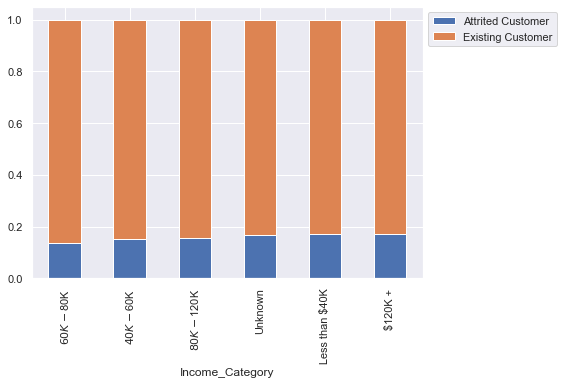

In [403]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

### Observations:

Customers earning more than $120K attrited most, this may be because they have much income and are easily attracted with good packages by competitors

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


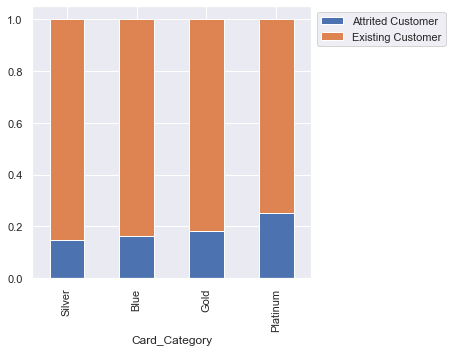

In [404]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

### Observations:

Platinum Card holder are the most attrited but this may be unconnected with the fact that they are small and little percentage may be high





Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


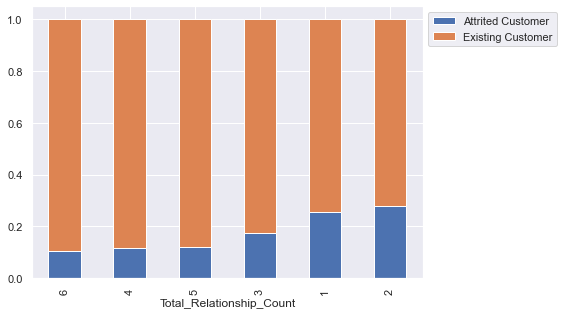

In [405]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

### Observations:

Most people that have one or two products with the bank attrited most and the one that have highesta '6' attrited least, this looks like when customers believes in the bank they purchase more product and are likely not to attrit. 

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


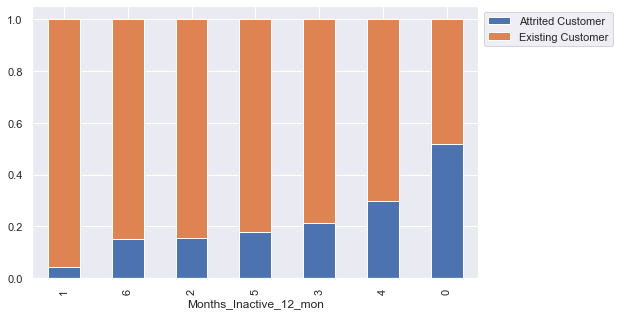

In [406]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

### Observation:

Customers that have zero inactive months attrited but this may not be actual as this may be connected with the fact that the number is small. We would investigate this further

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


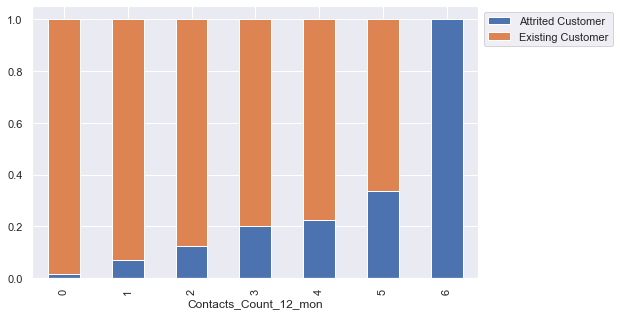

In [407]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

### Observation:

The customers contacted most are the ones that attrited, this may be unconnected with the fact that, when they begin to default the bank continue to contact them but they still attrited and they never responded to the contacts

### Attrition_Flag Vs (Customer Age, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct)

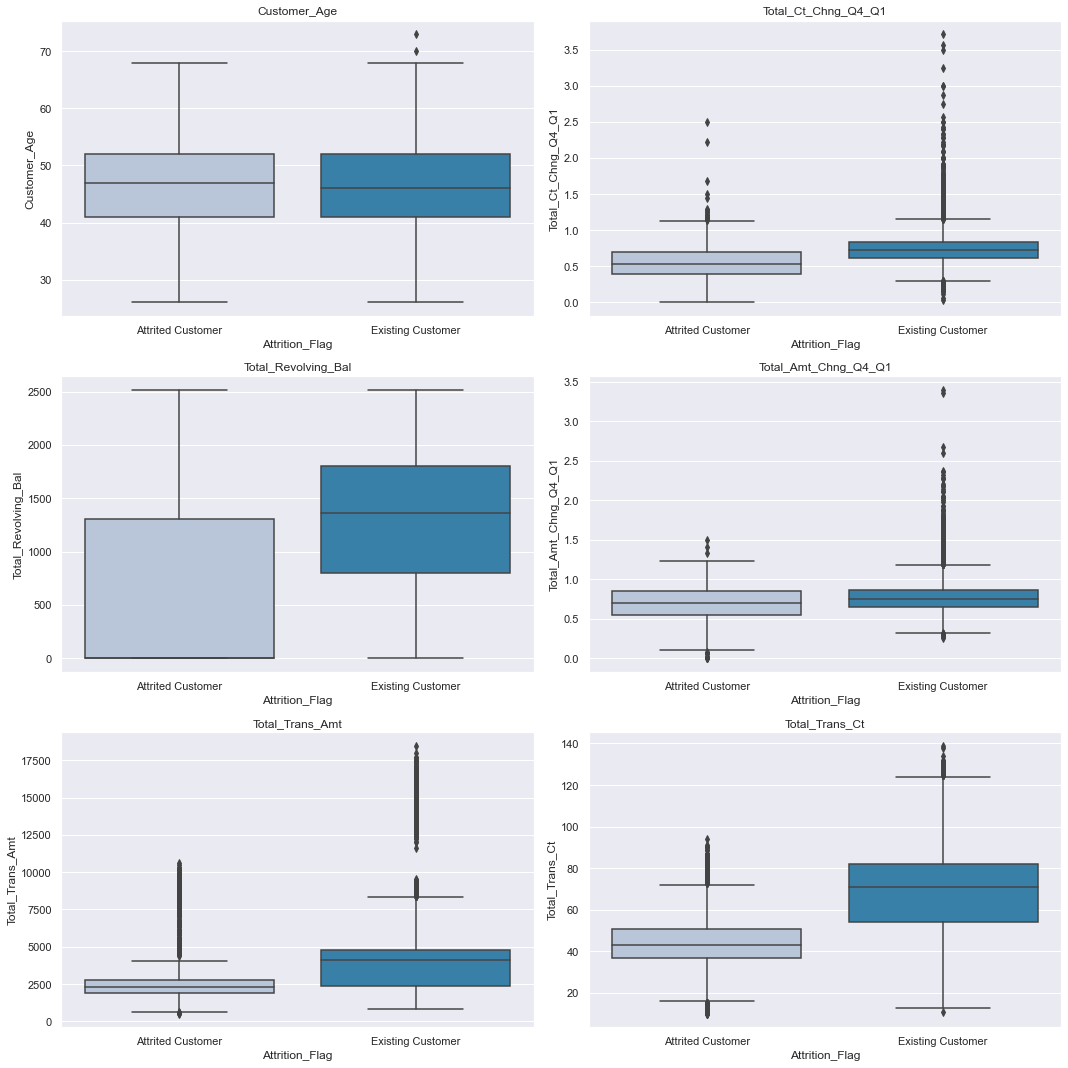

In [408]:
# Plotting boxplot between attrition and other continous variables 
cols = data[['Customer_Age','Total_Ct_Chng_Q4_Q1','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct']].columns.tolist()
plt.figure(figsize=(15,15))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Attrition_Flag"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

### Observations: 

Customer_Age and Months_on_book doesn't seem to have any effect on Attrition_Flag

Customers having lower Credit_Limit, Tota_Trans_Ct, Total_Trans_Amt, Total_Revolving_Bal and Avg_Open_To_Buy are more likely to attrite.

<AxesSubplot:xlabel='Customer_Age', ylabel='Attrition_Flag'>

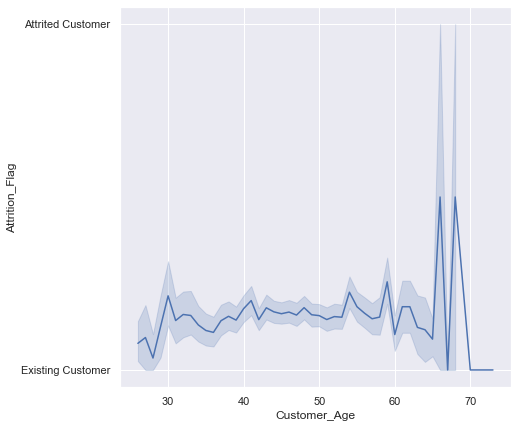

In [409]:
#Line plot to understand age variation with attrition 
sns.lineplot(x='Customer_Age',y='Attrition_Flag',data=data)

### Observations: 

Older Customers are more likely to attrit while there is a little peak attrition at age 30 for younger age but the highest peak attritions occurs at older age, more of retirees between 65 & 70

## Data Preparation for Modeling

In [410]:
#Copy Data into new dataframe df
df = data.copy()

In [411]:
#Separate the input and target varibles 
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

In [412]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [413]:
# Let's impute the missing values for the 2 categorical variables 
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
cols_to_impute = ["Education_Level", "Marital_Status"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

In [414]:
#Confirm no missing value
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 800 to 4035
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_Age              6075 non-null   int64   
 1   Gender                    6075 non-null   category
 2   Dependent_count           6075 non-null   category
 3   Education_Level           6075 non-null   object  
 4   Marital_Status            6075 non-null   object  
 5   Income_Category           6075 non-null   category
 6   Card_Category             6075 non-null   category
 7   Months_on_book            6075 non-null   int64   
 8   Total_Relationship_Count  6075 non-null   category
 9   Months_Inactive_12_mon    6075 non-null   category
 10  Contacts_Count_12_mon     6075 non-null   category
 11  Credit_Limit              6075 non-null   float64 
 12  Total_Revolving_Bal       6075 non-null   int64   
 13  Avg_Open_To_Buy           6075 non-null   floa

In [415]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

In [416]:
#Confirm Dummy variable has been implemented
X_train.head()

Customer_Age  Months_on_book  Credit_Limit  Total_Revolving_Bal  \
800             40              21     20056.000                 1602   
498             44              34      2885.000                 1895   
4356            48              36      6798.000                 2517   
407             41              36     27000.000                    0   
8728            46              36     15034.000                 1356   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
800         18454.000                 0.466             1687              46   
498           990.000                 0.387             1366              31   
4356         4281.000                 0.873             4327              79   
407         27000.000                 0.610             1209              39   
8728        13678.000                 0.754             7737              84   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_M  Dependent_count_1  \
800                 0.533                  0.080         1                  0   
498                 0.632                  0.657         1                  1   
4356                0.881                  0.370         1                  0   
407                 0.300                  0.000         1                  0   
8728                0.750                  0.090         1                  0   

      Dependent_count_2  Dependent_count_3  Dependent_count_4  \
800                   1                  0                  0   
498                   0                  0                  0   
4356                  0                  0                  1   
407                   1                  0                  0   
8728                  0                  0                  1   

      Dependent_count_5  Education_Level_Doctorate  Education_Level_Graduate  \
800                   0                          0                         1   
498                   0                          0                         1   
4356                  0                          0                         0   
407                   0                          0                         1   
8728                  0                          0                         0   

      Education_Level_High School  Education_Level_Post-Graduate  \
800                             0                              0   
498                             0                              0   
4356                            1                              0   
407                             0                              0   
8728                            1                              0   

      Education_Level_Uneducated  Marital_Status_Married  \
800                            0                       0   
498                            0                       1   
4356                           0                       1   
407                            0                       1   
8728                           0                       0   

      Marital_Status_Single  Income_Category_$40K - $60K  \
800                       1                            0   
498                       0                            0   
4356                      0                            0   
407                       0                            0   
8728                      0                            1   

      Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
800                             0                             0   
498                             0                             0   
4356                            0                             1   
407                             1                             0   
8728                            0                             0   

      Income_Category_Less than $40K  Income_Category_Unknown  \
800                                0                        0   
498                                0                        1  

## Model evaluation criterion
The company faces 2 types of losses:

1. Identifying that a customer would attrit but the Customer do not attrit - Loss Opportunity 


2. Identifying that a customer would not attrit but the Customer attrit - Loss Revenue 

Which Loss is greater?

Predicting a person not at risk of leaving his credit card, while actually person is at risk of leaving the credit card and closing his account.

How to reduce this loss i.e need to reduce False Negatives?

Company wants recall to be maximized i.e. we need to reduce the number of false negatives.

### 1.  Building six (6) models from Logistics regression, Decision trees, Bagging and Boostings Methods

In [417]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [418]:
#Function for evaluation confusion Matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [419]:
#Build the six models and evaluate the recalls 

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logreg", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores *100))


Cross-Validation Performance:

Logreg: 30.43432757718472
Bagging: 76.84196755625327
Random forest: 69.05232862375719
Adaboost: 80.52956567242282
Xgboost: 84.31972789115648
dtree: 77.65934065934064

Validation Performance:

Logreg: 46.62576687116564
Bagging: 81.59509202453987
Random forest: 71.47239263803681
Adaboost: 82.51533742331289
Xgboost: 88.65030674846625
dtree: 77.30061349693251


### Observation: 

Xgboost gave the highest recall and performance in both the training and validation 

### 2. Building six(6) models using oversampled data from: Logistics regression, Decision trees, Bagging and Boostings Methods

In [420]:
#Oversample the data using SMOTE 
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
X_val_over, y_val_over = sm.fit_resample(X_val, y_val)

In [421]:
#Build the six models with oversample data and evaluate the recalls 

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logreg", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance Oversample:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance Oversample:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val_over, model.predict(X_val_over))
    score.append(scores)
    print("{}: {}".format(name, scores *100))


Cross-Validation Performance Oversample:

Logreg: 81.50718697685159
Bagging: 95.92093363351228
Random forest: 96.82300987126942
Adaboost: 96.3327753083569
Xgboost: 97.94084935249859
dtree: 94.50866862937521

Validation Performance Oversample:

Logreg: 86.1764705882353
Bagging: 93.35294117647058
Random forest: 93.88235294117648
Adaboost: 97.1764705882353
Xgboost: 97.23529411764706
dtree: 90.70588235294117


### Observation: 

Xgboost had the highest recall in both the Training and Validation of the Oversampled data

### 3. Building six(6) models using undersampled data from: Logistics regression, Decision trees, Bagging and Boostings Methods

In [422]:
#Undersampling the data using randomundersampler
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)
X_val_un, y_val_un = rus.fit_resample(X_val, y_val)

In [423]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logreg", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance Undersample:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance Undersample:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val_un, model.predict(X_val_un))
    score.append(scores)
    print("{}: {}".format(name, scores *100))


Cross-Validation Performance Undersample:

Logreg: 77.46258503401361
Bagging: 90.67713239141811
Random forest: 91.39455782312925
Adaboost: 93.13710099424387
Xgboost: 94.05913134484564
dtree: 89.95918367346938

Validation Performance Undersample:

Logreg: 76.99386503067484
Bagging: 92.63803680981594
Random forest: 92.94478527607362
Adaboost: 95.0920245398773
Xgboost: 96.0122699386503
dtree: 87.42331288343557


### Observations: 

Xgboost had the best performance in both the undersampled data

## 3. Choosing the best three models to tune appropriately 

The following were picked based on perfomance: AdaBoost with Oversample data, XGBoost with oversample data, Decision tree with Over sample data.  

## AdaBoost Tunned with GridsearchCV Fitting 

In [424]:

%%time 
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
param_grid = {
    #We shall try different max_depth for base_estimator as this do have much effect
    #These 3 parameters were picked as they are the major influencers of AdaBoost
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=abc_tuned, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
Best parameters are {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.2, 'n_estimators': 10} with CV score=0.941566510804518:
Wall time: 13min 43s


In [425]:
# building model with best parameters as stated from the result above
abc_tuned = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(max_depth=3),
    n_estimators=10,
    learning_rate=0.2
)
# Fit the model on the oversample training data
abc_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.2, n_estimators=10)

In [426]:
# Calculating different metrics on train set based on the earlier function 
abc_tuned_over_train = model_performance_classification_sklearn(
    abc_tuned, X_train_over, y_train_over
)
print("Training performance:")
abc_tuned_over_train

Training performance:


Accuracy  Recall  Precision    F1
0     0.945   0.962      0.931 0.946

In [427]:
# Calculating different metrics on validation set based on earlier function 
abc_tuned_over_val = model_performance_classification_sklearn(abc_tuned, X_val_over, y_val_over)
print("Validation performance:")
abc_tuned_over_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.941   0.951      0.933 0.942

## Bagging Tunned with GridsearchCV Fitting 

In [428]:
%%time 

#defining the model
bag_tuned_over = BaggingClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
#Below are some of the key parameters of Bagging that do have impact on the model
# Grid of parameters to choose from
param_grid = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=bag_tuned_over, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train_over,y_train_over)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters are {'max_features': 0.7, 'max_samples': 1, 'n_estimators': 10} with CV score=1.0:
Wall time: 1min 3s


In [429]:
# building model with best parameters based on the result from above GridseachCV output
bag_tuned_over = BaggingClassifier(
    random_state=1,
    max_samples=1,
    max_features=0.7,
    n_estimators=10,
)
# Fit the model on training data
bag_tuned_over.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.7, max_samples=1, random_state=1)

In [430]:
# Calculating different metrics on oversampled training set
bag_tuned_train_over = model_performance_classification_sklearn(
    bag_tuned_over, X_train_over, y_train_over
)
print("Training performance:")
bag_tuned_train_over

Training performance:


Accuracy  Recall  Precision    F1
0     0.500   1.000      0.500 0.667

In [431]:
# Calculating different metrics on oversampled validation set
bag_tuned_over_val = model_performance_classification_sklearn(bag_tuned_over, X_val_over, y_val_over)
print("Validation performance:")
bag_tuned_over_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.500   1.000      0.500 0.667

## Decision Tree Tunned with GridsearchCV Fitting 

In [432]:
#defining the model
dt_tree_over = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV
#These parameters were selected as they are some of the key parameters that do have effect on the model
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, None],
    "min_samples_split": [2, 4, 7, 10, 15],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=dt_tree_over, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train_over, y_train_over)

print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2} 
Score: 0.9331326367642248


In [433]:
# building model with best parameters based on the result from above Gridsearch 
dt_tree_over = DecisionTreeClassifier(
    random_state=1,
    criterion ='entropy',
    min_samples_split=2,
    max_depth=None,
)

# Fit the model on training data
dt_tree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [434]:
# Calculating different metrics on oversampled train set
dt_tree_train_over = model_performance_classification_sklearn(
    dt_tree_over, X_train_over, y_train_over
)
print("Training performance:")
dt_tree_train_over

Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [435]:
# Calculating different metrics on oversampled validation set
dt_tree_train_over_val = model_performance_classification_sklearn(dt_tree_over, X_val_over, y_val_over)
print("Validation performance:")
dt_tree_train_over_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.935   0.928      0.941 0.935

## 4. Tuning the the best 3 models obtained above using randomized search and metric of interest 

## Decision Tree Tunned with RandomizedSearchCV Fitting 

In [436]:
#defining the model
dt_tree_Rand = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
# Parameters maintained as earlier to understand the impact 
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, None],
    "min_samples_split": [2, 4, 7, 10, 15],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=dt_tree_Rand,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_split': 2, 'max_depth': None, 'criterion': 'entropy'} with CV score=0.9331326367642248:


In [437]:
# building model with best parameters based on result from above 
dt_tree_Rand = DecisionTreeClassifier(
    random_state=1,
    min_samples_split = 2,
    max_depth = None,
    criterion = 'entropy'
)
# Fit the model on training data
dt_tree_Rand.fit(X_train_over, y_train_over)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [438]:
# Calculating different metrics on oversampled train set
dt_tree_Rand_over = model_performance_classification_sklearn(
    dt_tree_Rand, X_train_over, y_train_over
)
print("Training performance:")
dt_tree_Rand_over

Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [439]:
# Calculating different metrics on oversampled validation set
dt_tree_Rand_over_val = model_performance_classification_sklearn(dt_tree_Rand, X_val_over, y_val_over)
print("Validation performance:")
dt_tree_Rand_over_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.935   0.928      0.941 0.935

## AdaBoost Tunned with RandomizedSearchCV Fitting 

In [440]:
# definning the model
abc_tuned_Rand = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
# Mainting the same parameters as used under the GridsearchCV
param_grid = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=abc_tuned_Rand,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 100, 'learning_rate': 1.8000000000000003, 'base_estimator': DecisionTreeClassifier(max_depth=3)} with CV score=0.9137245280840501:


In [441]:
# building model with best parameters from the result of the RandomsearchCV above 
abc_tuned_Rand = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(max_depth=3),
    n_estimators=100,
    learning_rate=1.8000000000000003
)
# Fit the model on training data
abc_tuned_Rand.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.8000000000000003, n_estimators=100)

In [442]:
# Calculating different metrics on oversampled train set
abc_tuned_Rand_over_train = model_performance_classification_sklearn(
    abc_tuned_Rand, X_train_over, y_train_over
)
print("Training performance:")
abc_tuned_Rand_over_train

Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [443]:
#Fiting different metrics on oversampled validation set
abc_tuned_Rand_over_val = model_performance_classification_sklearn(abc_tuned_Rand, X_val_over, y_val_over)
print("Validation performance:")
abc_tuned_Rand_over_val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.964   0.952      0.976 0.964

## Bagging Tunned with RandomizedSearchCV Fitting 

In [444]:
%%time 
#defining the model
bag_tuned_Rand_over = BaggingClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV
#Below are some of the key parameters of Bagging that do have impact on the model
# Grid of parameters to choose from
param_grid = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=bag_tuned_Rand_over,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 10, 'max_samples': 1, 'max_features': 0.8} with CV score=1.0:
Wall time: 56.8 s


In [445]:
# building model with best parameters from above result
bag_tuned_Rand_over = BaggingClassifier(
    random_state=1,
    n_estimators=10,
    max_features=0.8
)

# Fit the model on training data
bag_tuned_Rand_over.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, random_state=1)

In [446]:
# Calculating different metrics on oversampled train set
bag_tuned_train_over_Rand = model_performance_classification_sklearn(
    xgb_tuned_over_Rand, X_train_over, y_train_over
)
print("Training performance:")
bag_tuned_train_over_Rand

Training performance:


Accuracy  Recall  Precision    F1
0     0.780   1.000      0.695 0.820

In [447]:
#Fiting different metrics on oversampled validation set
bag_tuned_over_Rand_Val = model_performance_classification_sklearn(xgb_tuned_over_Rand, X_val_over, y_val_over)
print("Validation performance:")
bag_tuned_over_Rand_Val

Validation performance:


Accuracy  Recall  Precision    F1
0     0.788   0.999      0.702 0.825

### Training Performance of Tunned Model Comparison

In [448]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        abc_tuned_over_train.T,
        abc_tuned_Rand_over_train.T,
        bag_tuned_train_over.T,
        bag_tuned_train_over_Rand.T,
        dt_tree_over_train.T,
        dt_tree_Rand_over_train.T,
    ],
    
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost Oversampled Data with Grid search",
    "AdaBoost Oversampled Data Tuned with Random search",
    "Bagging Oversampled Data Tuned with Grid search",
    "Bagging Oversampled Data Tuned with Random search",
    "Decision Oversampled Data Tuned with Grid Search",
    "Decision Oversampled Data Tuned with Random Search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


AdaBoost Oversampled Data with Grid search  \
Accuracy                                        0.945   
Recall                                          0.962   
Precision                                       0.931   
F1                                              0.946   

           AdaBoost Oversampled Data Tuned with Random search  \
Accuracy                                               1.000    
Recall                                                 1.000    
Precision                                              1.000    
F1                                                     1.000    

           Bagging Oversampled Data Tuned with Grid search  \
Accuracy                                             0.500   
Recall                                               1.000   
Precision                                            0.500   
F1                                                   0.667   

           Bagging Oversampled Data Tuned with Random search  \
Accuracy                                               0.780   
Recall                                                 1.000   
Precision                                              0.695   
F1                                                     0.820   

           Decision Oversampled Data Tuned with Grid Search  \
Accuracy                                              1.000   
Recall                                                1.000   
Precision                                             1.000   
F1                                                    1.000   

           Decision Oversampled Data Tuned with Random Search  
Accuracy                                               1.000   
Recall                                                 1.000   
Precision                                              1.000   
F1                                                     1.000

In [449]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        abc_tuned_over_val.T,
        abc_tuned_Rand_over_val.T,
        bag_tuned_over_val.T,
        bag_tuned_over_Rand_Val.T,
        dt_tree_over_train.T,
        dt_tree_Rand_over_val.T,      
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "AdaBoost Oversampled Data with Grid search",
    "AdaBoost Oversampled Data Tuned with Random search",
    "Bagging Oversampled Data Tuned with Grid search",
    "Bagging Oversampled Data Tuned with Random search",
    "Decision Oversampled Data Tuned with Grid Search",
    "Decision Oversampled Data Tuned with Random Search"  
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


AdaBoost Oversampled Data with Grid search  \
Accuracy                                        0.941   
Recall                                          0.951   
Precision                                       0.933   
F1                                              0.942   

           AdaBoost Oversampled Data Tuned with Random search  \
Accuracy                                               0.964    
Recall                                                 0.952    
Precision                                              0.976    
F1                                                     0.964    

           Bagging Oversampled Data Tuned with Grid search  \
Accuracy                                             0.500   
Recall                                               1.000   
Precision                                            0.500   
F1                                                   0.667   

           Bagging Oversampled Data Tuned with Random search  \
Accuracy                                               0.788   
Recall                                                 0.999   
Precision                                              0.702   
F1                                                     0.825   

           Decision Oversampled Data Tuned with Grid Search  \
Accuracy                                              1.000   
Recall                                                1.000   
Precision                                             1.000   
F1                                                    1.000   

           Decision Oversampled Data Tuned with Random Search  
Accuracy                                               0.935   
Recall                                                 0.928   
Precision                                              0.941   
F1                                                     0.935

### Observation: 

AdaBoost Oversampled Data with Gridsearch gave the best model both with the following tunned parameters ({'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.2, 'n_estimators': 10} ). In addition it does not suffer Overfitting such as having all metrics as 1 as shown in many results) as most of the other models and the recall is high including accuracy, Precision and F1.




## 5. Develop Pipeline for the best model; AdaBoost with Oversampled data fitted with Gridsearch

In [450]:
# creating the list of numerical variables
numerical_features = ["Customer_Age", "Months_on_book", "Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1",
                     "Total_Trans_Amt", "Total_Trans_Ct", "Avg_Utilization_Ratio"]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

# creating the list of categorical variables
categorical_features = ['Gender','Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category' , 
           'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon'
]

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

In [451]:
# Separating target variable and other variables
X = df.drop(["Attrition_Flag"], axis=1)
Y = data["Attrition_Flag"]

In [452]:
# Splitting the data into train and test sets
# Validation is not required again, we only use it for the model
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [453]:
# Creating new pipeline with best parameters which is AdaBoost

model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "AdaBoost",
            AdaBoostClassifier(
                 random_state=1,
                 base_estimator = DecisionTreeClassifier(max_depth=3),
                 n_estimators=10,
                 learning_rate=0.2,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Avg_Utilization_Ratio']),
                                      

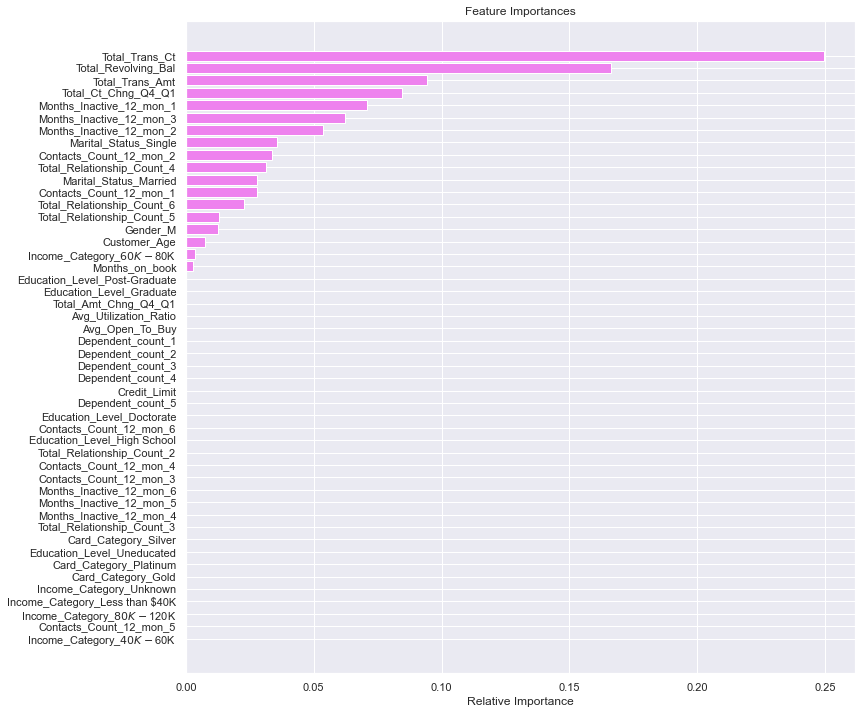

In [454]:
#Find the feature importance of the best model 
feature_names = X_train_over.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

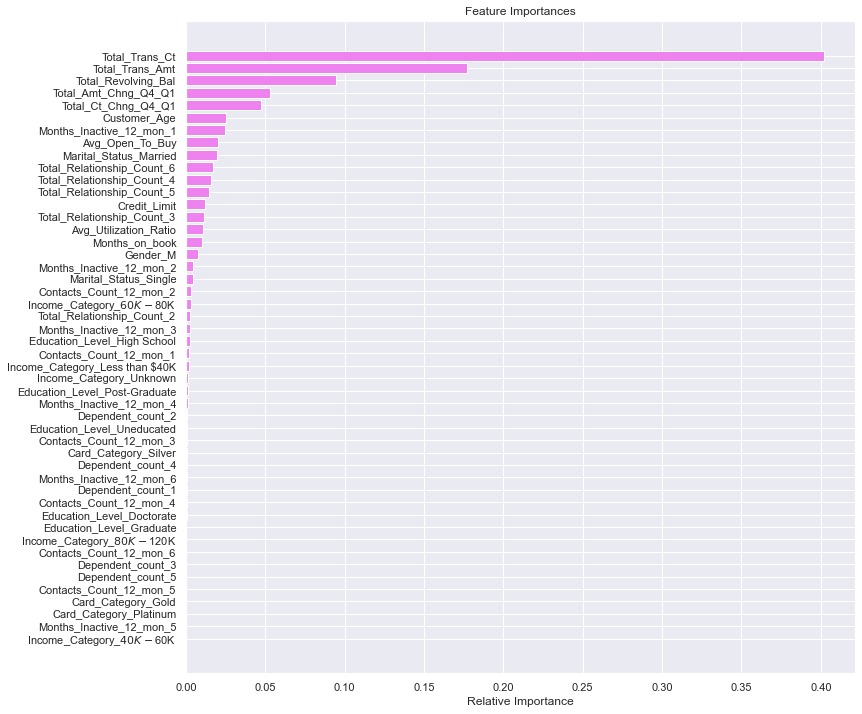

In [455]:
feature_names = X_train_over.columns
importances = dt_tree_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Business Recommendation and Insight 

From the Feature importance based on the Tunned Oversampled Adaboost which is the main model that has the best prediction and validatiing with Tunned decision tree to be sure the higher importance also reflects, shows the following features have the highest importance : Total_Trans_Ct: Total Transaction Count (Last 12 months), Total_Trans_Amt: Total Transaction Amount (Last 12 months), Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance, Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter, Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter, Months_Inactive_12_mon: No. of months inactive in the last 12 months, Total_Relationship_Count: Total no. of products held by the customer, Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
        

- Our analysis shows that the Total_Trans_Ct which is the 'Total Transaction Count (Last 12 months)' for customers that attrited was very low compared to the existing customers, which means most of the customers that attrited begin to have lower transaction count within 12 months of attrition.Therefore, the bank should develop a minimum threshold whereby if the transaction within the last 12 months of any customers drops below the threshold a special package,follow-up plan and engagement should be targetted at those customers to prevent them from attrition.


- The analysis shows that the Total_Trans_Amt - Total Transaction Amount (Last 12 months)  for customers that attrited was very low compared to the existing customers, which implies that most of the customers that attrited begins to have smaller transaction amount within 12 months of attrition. Therefore, the bank should identify these customers and understand the reason for the lower transaction this maybe in for of survey and then develop a package that can support them within the period.


- The analysis shows that, the Total_Revolving_Bal which is the balance carry over from one month to the next is also low for the attrited customers as compared to existing customers. The bank should develop a dashboard to reflect the revolving balance and automate a survey to the customers to understand the reason for the lower balance carry over, the bank should review further how many months of continous revolving lower balance really causes customers attrition and use that to engage customers. 


- The analysis shows that, more attrited customers have lower ratio which means less transaction count,since the   Total_Ct_Chng_Q4_Q is the Ratio of the total transaction count in 4th quarter as compared to the total transaction count in 1st quarter. This is also applicable to the ratio of transact - Total_Amt_Chng_Q4_Q1, which is the Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter. To respond to this, the performance of the customers account between these two quarters should be reviewed to understand when it begins to reduce in count and amount and if the bank can understand the reason and engage the customers early through survey or feedback and respond accordingly. 


- The analysis shows that, those that have been inactive for 1, 2, & 3 months attrits most, therefore being active may not be a good indication that a customer would not attrit other factors should be considered when reviewing customers attrition. 


- The analysis reflects that, singles are the most attrited and this may not be unconnected with the fact that they are mobile and have less dependent. The bank should develop systems that would enhance special package for singles which would also help in maintaining their loyalty. Discounts and single related and cashbacks on singles related items could help them stay more with the bank. 


- The analysis reflects the more the Total relationship count, the less the customers attrited, the bank should works towards encouraging the customers to subscribe to other products, this would help reduce the attrition as the challenge of losing all the products would help the customer to stop attrition. The bank should continue to introduce more products to customers and give more discounts to customers that that subscribes to more products. 


- The analysis reflects that the customers contacted most are the ones that attrited, this may be unconnected with the fact that, when they begin to default the bank continue to contact them but they still attrited and they never responded to the contacts. The bank should work on the current constact method as it does not show that it is productive. A more productive contact and engagement method should be implemented. 